## **DATA ANALYSIS PYTHON PROJECT - PRODUCTS ANALYSIS**

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Import Raw data

In [2]:
df = pd.read_excel("ProductAnalysis.xlsx")

#### Sample data

In [3]:
df.head(12)

,Order_ID,Order_Date,Product_ID,Product_Name,Category,Sub_Category,Unit_Price,Cost_Price,Quantity,Discount,Revenue,Profit,Customer_ID,Customer_Segment,Region,Country,Sales_Channel
0,3001,2025-01-02,P301,Wireless Mouse,Electronics,Accessories,25.99,15,2.0,0.10,46.78,16.78,C201,Consumer,North America,USA,Online
1,3002,2025-01-03,P302,Bluetooth Keyboard,Electronics,Accessories,45.00,28,1.0,NaN,45.00,17.00,C202,Corporate,Europe,Germany,Online
2,3003,2025-01-04,P303,Laptop Stand,Electronics,Accessories,39.99,22,NaN,0.05,113.97,47.97,C203,Consumer,Asia,India,Offline
3,3004,2025-01-05,P304,Office Chair,Furniture,Seating,180.00,120,1.0,0.15,153.00,NaN,C204,Corporate,North America,Canada,Offline
4,3005,2025-01-06,P305,Desk Lamp,Furniture,Lighting,30.00,18,4.0,0.00,120.00,48.00,NaN,Home Office,Europe,France,Online
5,3006,2025-01-07,P306,Water Bottle,Accessories,Lifestyle,15.00,6,6.0,0.10,81.00,45.00,C206,Consumer,Asia,NaN,Online
6,3007,2025-01-08,P307,Notebook,Stationery,Paper,5.00,2,20.0,0.20,80.00,40.00,C207,Consumer,Asia,India,Offline
7,3007,2025-01-08,P307,Notebook,Stationery,Paper,5.00,2,20.0,0.20,80.00,40.00,C207,Consumer,Asia,India,Offline
8,3008,2025-01-09,P308,Monitor 24-inch,Electronics,Displays,220.00,160,2.0,0.05,418.00,98.00,C208,Corporate,Europe,UK,Offline
9,3009,2025-01-10,P309,Smartphone Stand,Accessories,Mobile,12.50,5,8.0,0.00,100.00,60.00,C209,Home Office,North America,USA,Online


#### Size of data

In [4]:
print("Size of data :",df.shape)

Size of data : (12, 17)


#### Field Information

In [5]:
df.columns

Index(['Order_ID', 'Order_Date', 'Product_ID', 'Product_Name', 'Category',
       'Sub_Category', 'Unit_Price', 'Cost_Price', 'Quantity', 'Discount',
       'Revenue', 'Profit', 'Customer_ID', 'Customer_Segment', 'Region',
       'Country', 'Sales_Channel'],
      dtype='object')

#### Data Types

In [6]:
df.dtypes

Order_ID              int64
Order_Date           object
Product_ID           object
Product_Name         object
Category             object
Sub_Category         object
Unit_Price          float64
Cost_Price            int64
Quantity            float64
Discount            float64
Revenue             float64
Profit              float64
Customer_ID          object
Customer_Segment     object
Region               object
Country              object
Sales_Channel        object
dtype: object

### DATA CLEANING

##### Checking Null Values

In [7]:
print(df.isnull().sum())

Order_ID            0
Order_Date          1
Product_ID          0
Product_Name        0
Category            0
Sub_Category        0
Unit_Price          0
Cost_Price          0
Quantity            1
Discount            1
Revenue             0
Profit              1
Customer_ID         1
Customer_Segment    0
Region              0
Country             1
Sales_Channel       0
dtype: int64


##### Handling Null Values

In [8]:
df["Order_Date"] = df["Order_Date"].fillna("2025-01-12")
df["Quantity"] = df["Quantity"].fillna(3.0)
df["Discount"] = df["Discount"].fillna(0.0)
df["Profit"] = df["Profit"].fillna(0.0)
df["Customer_ID"] = df["Customer_ID"].fillna("C205")
df["Country"] = df["Country"].fillna(0)

##### Checking Duplicates Values

In [9]:
df["Order_ID"].duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
Name: Order_ID, dtype: bool

##### Deleting Duplicates Values

In [10]:
df.drop_duplicates()

,Order_ID,Order_Date,Product_ID,Product_Name,Category,Sub_Category,Unit_Price,Cost_Price,Quantity,Discount,Revenue,Profit,Customer_ID,Customer_Segment,Region,Country,Sales_Channel
0,3001,2025-01-02,P301,Wireless Mouse,Electronics,Accessories,25.99,15,2.0,0.10,46.78,16.78,C201,Consumer,North America,USA,Online
1,3002,2025-01-03,P302,Bluetooth Keyboard,Electronics,Accessories,45.00,28,1.0,0.00,45.00,17.00,C202,Corporate,Europe,Germany,Online
2,3003,2025-01-04,P303,Laptop Stand,Electronics,Accessories,39.99,22,3.0,0.05,113.97,47.97,C203,Consumer,Asia,India,Offline
3,3004,2025-01-05,P304,Office Chair,Furniture,Seating,180.00,120,1.0,0.15,153.00,0.00,C204,Corporate,North America,Canada,Offline
4,3005,2025-01-06,P305,Desk Lamp,Furniture,Lighting,30.00,18,4.0,0.00,120.00,48.00,C205,Home Office,Europe,France,Online
5,3006,2025-01-07,P306,Water Bottle,Accessories,Lifestyle,15.00,6,6.0,0.10,81.00,45.00,C206,Consumer,Asia,0,Online
6,3007,2025-01-08,P307,Notebook,Stationery,Paper,5.00,2,20.0,0.20,80.00,40.00,C207,Consumer,Asia,India,Offline
8,3008,2025-01-09,P308,Monitor 24-inch,Electronics,Displays,220.00,160,2.0,0.05,418.00,98.00,C208,Corporate,Europe,UK,Offline
9,3009,2025-01-10,P309,Smartphone Stand,Accessories,Mobile,12.50,5,8.0,0.00,100.00,60.00,C209,Home Office,North America,USA,Online
10,3010,2025-01-11,P301,Wireless Mouse,Electronics,Accessories,25.99,15,5.0,0.00,129.95,54.95,C201,Consumer,North America,USA,Online


### KPI REQUIREMENTS

In [11]:
#Total Revenue
total_revenue = df['Revenue'].sum()

#Total Profit
total_profit = df['Profit'].sum()

#Profit Margin
profit_margin = (total_profit / total_revenue) * 100

#Maximum product
top_product = df.groupby("Product_Name")["Quantity"].sum().idxmax()

#High cost product
H_C_product = df.groupby("Product_Name")["Cost_Price"].sum().idxmax()
                         
#Display
print(f"Total Revenue : ${total_revenue :,.0f}")
print(f"Total Profit : ${total_profit :,.0f}")
print(f"Profit Margin : ${profit_margin :,.0f}")
print("Highest quantity product :",top_product) 
print("High cost Product :",H_C_product)

Total Revenue : $1,476
Total Profit : $501
Profit Margin : $34
Highest quantity product : Notebook
High cost Product : Monitor 24-inch


### CHARTS REQUIREMENT

#### Analyze Total Cost contribution by each Product

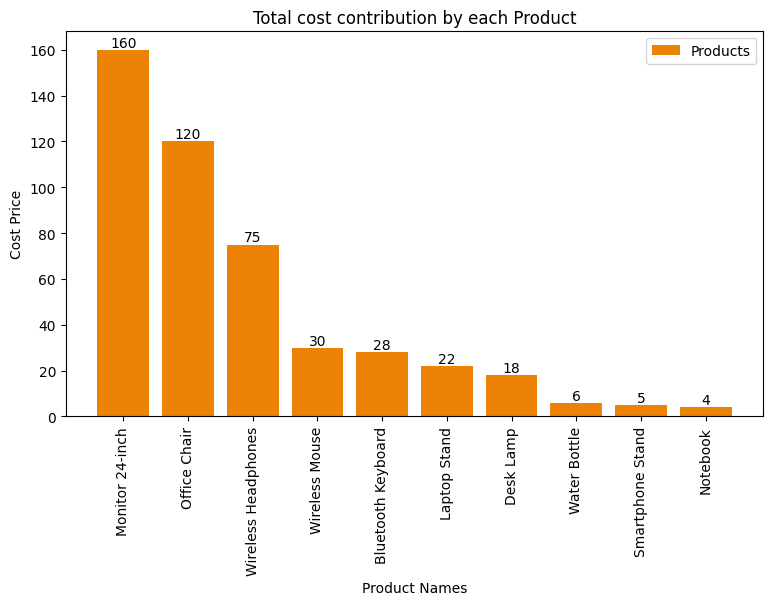

In [61]:
gp = df.groupby("Product_Name")["Cost_Price"].sum().sort_values(ascending = False)
plt.figure(figsize=(9,5))
bars = plt.bar(gp.index,gp.values,color ="#EC8305",label="Products")
plt.bar_label(bars)
plt.xticks(rotation=90)
plt.xlabel("Product Names")
plt.ylabel("Cost Price")
plt.title("Total cost contribution by each Product")
plt.legend()
plt.show()

#### Top Selling Product by quantity

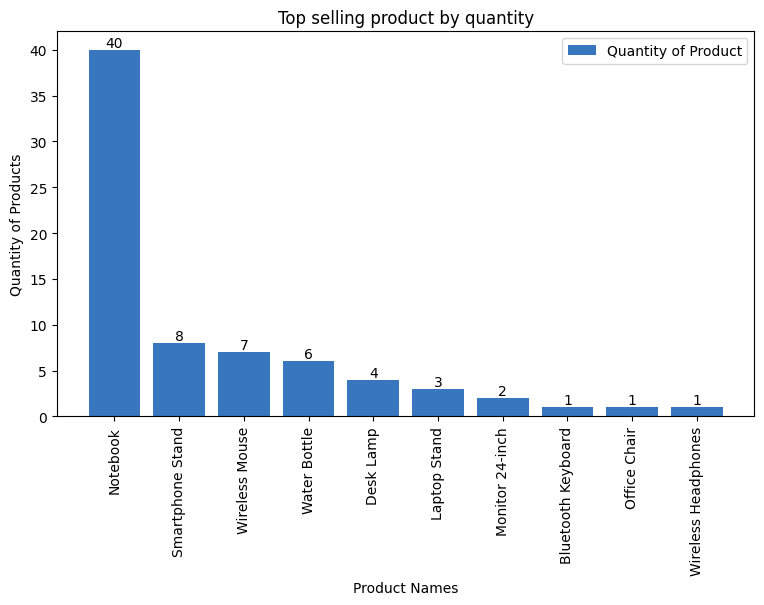

In [65]:
gp = df.groupby("Product_Name")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(9,5))
bars = plt.bar(gp.index,gp.values,color="#3876BF",label="Quantity of Product")
plt.bar_label(bars)
plt.xticks(rotation=90)
plt.xlabel("Product Names")
plt.ylabel("Quantity of Products")
plt.title("Top selling product by quantity")
plt.legend()
plt.show()

#### Analyze Revenue and Profit by Product

<Figure size 900x500 with 0 Axes>

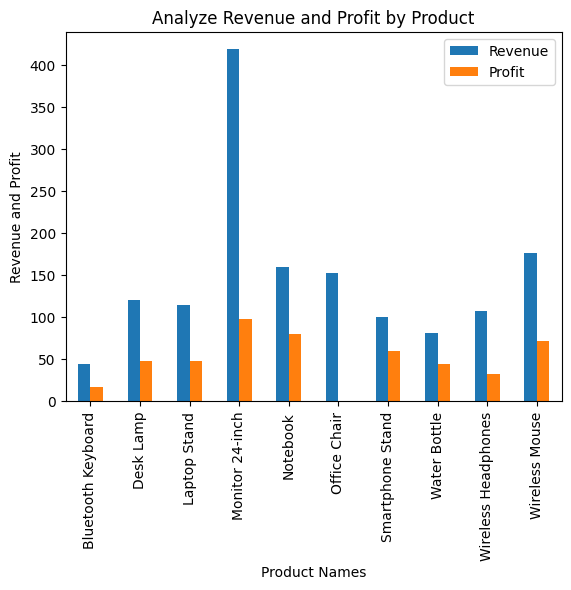

In [55]:
gp = df.groupby("Product_Name")[["Revenue","Profit"]].sum()
plt.figure(figsize=(9,5))
gp.plot(kind="bar")
plt.xlabel("Product Names")
plt.ylabel("Revenue and Profit")
plt.title("Analyze Revenue and Profit by Product")
plt.xticks(rotation=90)
plt.show()

#### Sales Comparison : Online vs Offline channels

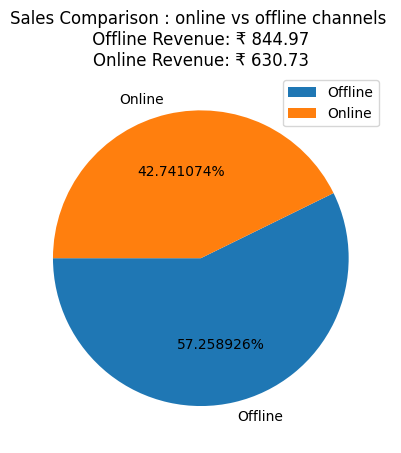

In [18]:
gp = df.groupby("Sales_Channel")["Revenue"].sum()
bars = plt.pie(gp.values ,labels = gp.index,autopct="%2f%%",startangle=180)
plt.title("Sales Comparison : online vs offline channels \n Offline Revenue: ₹ 844.97 \nOnline Revenue: ₹ 630.73")
plt.legend()
plt.show()

#### Identify the country with the highest product purchases

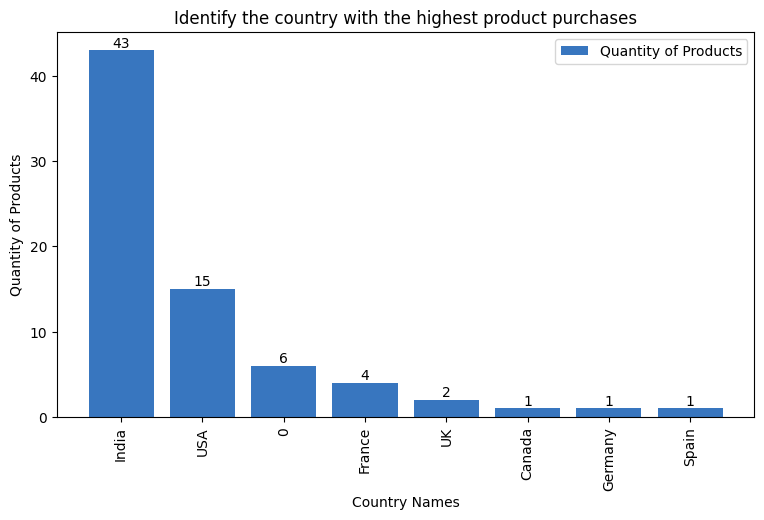

In [68]:
df["Country"] = df["Country"].astype(str)
gp = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(9,5))
bars = plt.bar(gp.index,gp.values,color="#3876BF",label="Quantity of Products")
plt.bar_label(bars)
plt.xticks(rotation=90)
plt.xlabel("Country Names")
plt.ylabel("Quantity of Products")
plt.title("Identify the country with the highest product purchases")
plt.legend()
plt.show()